<a href="https://colab.research.google.com/github/ander002/DeepLearning/blob/main/DeepLearning_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#现代卷积神经网络
> * AlexNet。它是第⼀个在⼤规模视觉竞赛中击败传统计算机视觉模型的⼤型神经⽹络；
* 使⽤重复块的⽹络（VGG）。它利⽤许多重复的神经⽹络块；
* ⽹络中的⽹络（NiN）。它重复使⽤由卷积层和1 × 1 卷积层（⽤来代替全连接层）来构建深层⽹络;
* 含并⾏连结的⽹络（GoogLeNet）。它使⽤并⾏连结的⽹络，通过不同窗口⼤小的卷积层和最⼤汇聚层来并⾏抽取信息；
* 残差⽹络（ResNet）。它通过残差块构建跨层的数据通道，是计算机视觉中最流⾏的体系结构；
* 稠密连接⽹络（DenseNet）。它的计算成本很⾼，但给我们带来了更好的效果。

## AlexNet
> ⾸次证明了学习到的特征可以超越⼿⼯设计的特征,AlexNet和LeNet的架构⾮常相似,这里给出他们的对比图，左为LeNet:

![AlexNet](http://pan.anderd.com/download/6152e8da7015ee003ff4fce3)


### 模型设计
&emsp;&emsp;在AlexNet的第⼀层，卷积窗口的形状是 11×11。由于ImageNet中⼤多数图像的宽和⾼⽐MNIST图像的多10倍以上，因此，需要⼀个更⼤的卷积窗口来捕获⽬标。第⼆层中的卷积窗口形状被缩减为 5×5，然后是 3×3。此外，在第⼀层、第⼆层和第五层卷积层之后，加⼊窗口形状为 3×3、步幅为2的最⼤汇聚层。而且，AlexNet的卷积通道数⽬是LeNet的10倍。在最后⼀个卷积层后有两个全连接层，分别有4096个输出。

### 激活函数
&emsp;&emsp;AlexNet将sigmoid激活函数改为更简单的ReLU激活函数。⼀⽅⾯，ReLU激活函数的计算更简单，它不需要如sigmoid激活函数那般复杂的求幂运算。另⼀⽅⾯，当使⽤不同的参数初始化⽅法时，ReLU激活函数使训练模型更加容易。当sigmoid激活函数的输出⾮常接近于0或1时，这些区域的梯度⼏乎为0，因此反向传播**⽆法继续更新⼀些模型参数**。相反，ReLU激活函数在正区间的梯度总是1。因此，**如果模型参数没有正确初始化，sigmoid函数可能在正区间内得到⼏乎为0的梯度，从而使模型⽆法得到有效的训练**。

### 容量处理和预处理
&emsp;&emsp;AlexNet通过dropout控制全连接层的模型复杂度，而LeNet只使⽤了权重衰减。为了进⼀步扩充数据，AlexNet在训练时增加了⼤量的图像增强数据，如翻转、裁切和变⾊。这使得模型更健壮，更⼤的样本量有效地减少了过拟合。

### AlexNet和LeNet的复杂度对比

![复杂度](http://pan.anderd.com/download/6152f843064718003f35d225)


In [2]:
!pip install d2l

     |████████████████████████████████| 83 kB 1.4 MB/s 


In [3]:
#实现
import torch
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    #这里我们用11*11的窗口来捕捉对象，步幅为4，以减少输出的高度和宽度。输出通道也比LeNet变大了好多。
    nn.Conv2d(1,96,kernel_size=11,stride=4,padding=1),nn.ReLU(),
    #改用最大池化层
    nn.MaxPool2d(kernel_size=3,stride=2),
    #减少卷积窗口，使用填充为2，来使得输入和输出的高和宽一致。让后增大输出通道
    nn.Conv2d(96,256,kernel_size=5,padding=2),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    #使用三个连续的卷积层和较小的卷积窗口，除了最后的卷积层，输出通道的数量进一步增加。
    nn.Conv2d(256,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Flatten(),
    #这里，全连接层的输出数量是LeNet中的好几倍，使用dropout层来减轻过度拟合
    nn.Linear(6400,4096),nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096,4096),nn.ReLU(),
    nn.Dropout(p=0.5),
    #输出层，由于我们用Fashion-MNIST，所以类别数为10。
    nn.Linear(4096,10))

In [4]:
#构造一个高度和宽度都为224的单通道数据，来观察每一层输出的形状
X = torch.randn(1,1,224,224)
for layer in net:
  X = layer(X)
  print(layer.__class__.__name__,'OutPut shape: \t',X.shape)

Conv2d OutPut shape: 	 torch.Size([1, 96, 54, 54])
ReLU OutPut shape: 	 torch.Size([1, 96, 54, 54])
MaxPool2d OutPut shape: 	 torch.Size([1, 96, 26, 26])
Conv2d OutPut shape: 	 torch.Size([1, 256, 26, 26])
ReLU OutPut shape: 	 torch.Size([1, 256, 26, 26])
MaxPool2d OutPut shape: 	 torch.Size([1, 256, 12, 12])
Conv2d OutPut shape: 	 torch.Size([1, 384, 12, 12])
ReLU OutPut shape: 	 torch.Size([1, 384, 12, 12])
Conv2d OutPut shape: 	 torch.Size([1, 384, 12, 12])
ReLU OutPut shape: 	 torch.Size([1, 384, 12, 12])
Conv2d OutPut shape: 	 torch.Size([1, 256, 12, 12])
ReLU OutPut shape: 	 torch.Size([1, 256, 12, 12])
MaxPool2d OutPut shape: 	 torch.Size([1, 256, 5, 5])
Flatten OutPut shape: 	 torch.Size([1, 6400])
Linear OutPut shape: 	 torch.Size([1, 4096])
ReLU OutPut shape: 	 torch.Size([1, 4096])
Dropout OutPut shape: 	 torch.Size([1, 4096])
Linear OutPut shape: 	 torch.Size([1, 4096])
ReLU OutPut shape: 	 torch.Size([1, 4096])
Dropout OutPut shape: 	 torch.Size([1, 4096])
Linear OutPut sh

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [5]:
#获取数据集，还是用Fashion-MNIST数据集，但有一个问题是图像分辨率，这里我们用resize参数来调整。使之适合AlexNet。
batch_size = 128
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

loss 0.329, train acc 0.879, test acc 0.882
634.1 examples/sec on cuda:0


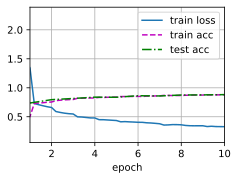

In [6]:
lr,num_epochs = 0.01, 10
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())